In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import fft, ifft

In [3]:
# In python, the complex number i is written j, e.g.:
a=2.0+3.0j
b=-0.4+0.2j

print(a+b) # addition
print(a*b) # multiplication
print(np.real(a)) # the real part via the "function"
print(a.real) # the real part via the "method"
print(b.imag) # imaginary part
print(np.abs(a)) # absolute value (or modulus or magnitude)
print(np.angle(b)) #argument (in many applications referred to as the "phase")

(1.6+3.2j)
(-1.4000000000000001-0.8000000000000002j)
2.0
2.0
0.2
3.6055512754639896
2.677945044588987


[0.    0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875
 7.5   8.125 8.75  9.375]


<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
/var/folders/bt/zzd2l67j1_q8rr67lxy61gzc0000gn/T/ipykernel_17764/3994107409.py:28: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


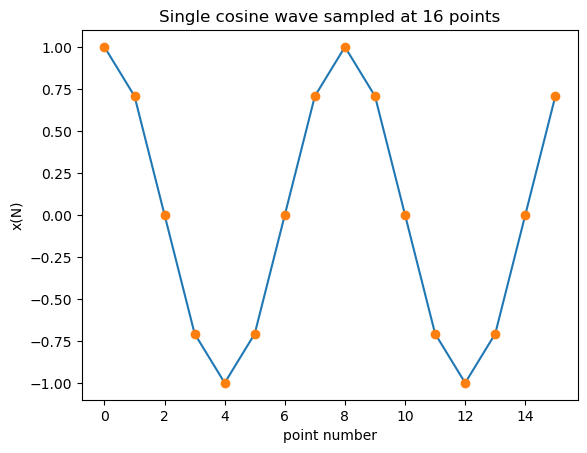

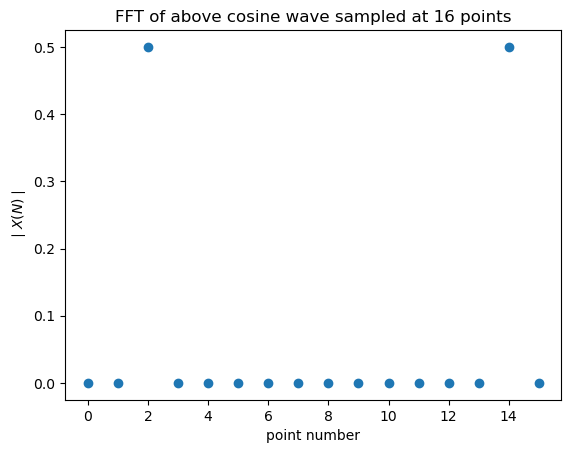

[ 1.24474906e-17+0.00000000e+00j -8.09007171e-17+5.45853242e-17j
  5.00000000e-01-1.72254642e-16j  1.96378097e-17-6.76736094e-17j
  1.53080850e-17-2.77555756e-17j  2.36599931e-17-6.76736094e-17j
  5.55111512e-17-4.97899625e-17j  3.76029143e-17+5.45853242e-17j
 -4.30636606e-17+0.00000000e+00j  3.76029143e-17-5.45853242e-17j
  5.55111512e-17+4.97899625e-17j  2.36599931e-17+6.76736094e-17j
  1.53080850e-17+2.77555756e-17j  1.96378097e-17+6.76736094e-17j
  5.00000000e-01+1.72254642e-16j -8.09007171e-17-5.45853242e-17j]


In [4]:
# There are several FFT algorithms which are simple to use. We’ll just use fft and ifft. 
# First set up a data array to test out the method:
# Examine a small number of points to see what happens more easily
N=16 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0 
plt.plot(x)
plt.plot(x, 'o') # show as points and line 
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('point number')
plt.ylabel('x(N)')
plt.show();

# This sets up a cosine wave of just 16 points, so it looks a bit rough when plotted out, 
# but it helps us to see better what happens when we look at the FFT. 
# Use this code snippet to do the FFT:
X = fft(x)/N # fft and normalise 
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points') 
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.show();
print(X)


# The wrapper function to the fft below is handy as it returns not just the Fourier amplitudes but also the corresponding frequencies. 
# (There are actually other ways to do it using numpy directly, but it helps to show these details.)

def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range 
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values 
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X

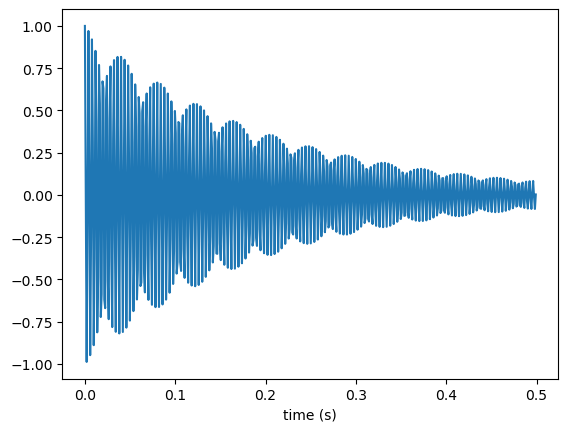

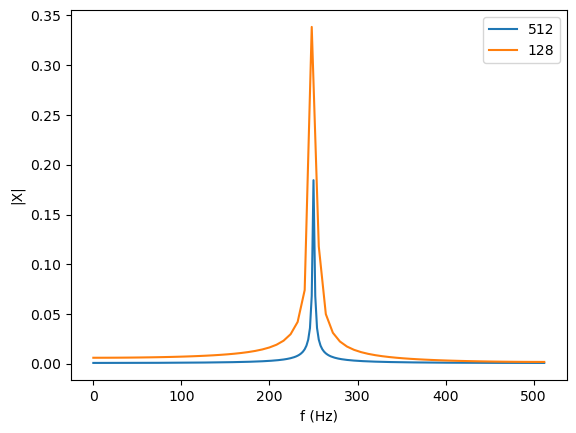

In [5]:
# exercise 0

def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range 
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values 
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X

def f(N, Fs):
    nu=250
    lam=5

    tau=N/Fs
    t=np.linspace(0, tau, N, endpoint=False) #creates N points to cover tau seconds

    return np.cos(2*np.pi*nu*t)*np.exp(-lam*t)

N=512
Fs=1024
tau=N/Fs
t=np.linspace(0, tau, N, endpoint=False)
plt.plot(t, f(512, 1024))
plt.xlabel('time (s)')
plt.show()

frq512 , X512 = Spectrum1(f(512, 1024), 1024)
frq128 , X128 = Spectrum1(f(128, 1024), 1024)
                         
plt.plot(frq512, np.abs(X512), label=512)
plt.plot(frq128, np.abs(X128), label=128)
plt.xlabel('f (Hz)')
plt.ylabel('|X|')
plt.legend()
plt.show()

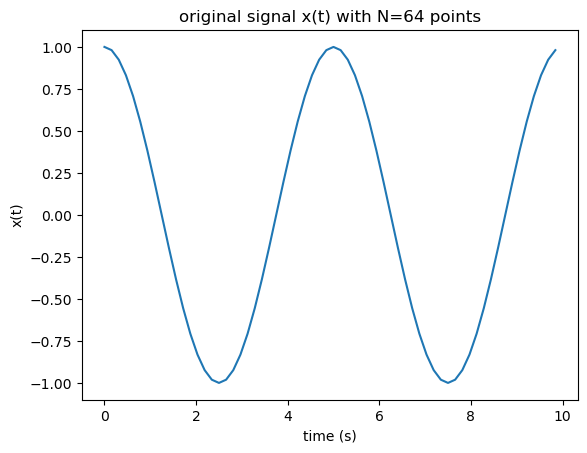

In [6]:
# exercise 1

N=64 #number of points
tau=10 #total time 
t=np.linspace(0, tau, N, endpoint=False) #time array
f=0.2 #Hz, freq of cos
x=np.cos(2*np.pi*f*t) #signal x(t)

# plotting x vs time
plt.plot(t, x)
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.title('original signal x(t) with N=64 points')
plt.show();

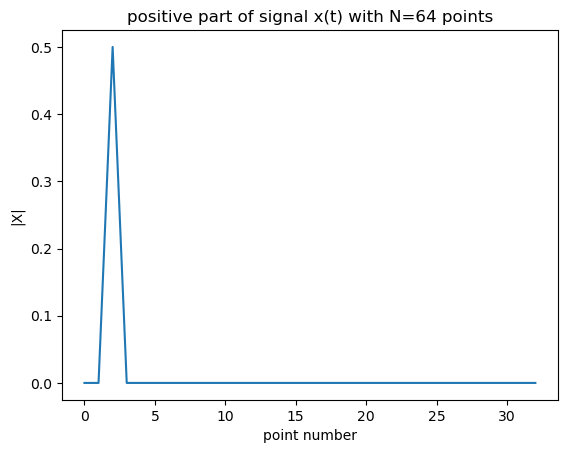

In [7]:
# exercise 2

# use the same stuff from exercise 1
N=64 #number of points
tau=10 #total time 
t=np.linspace(0, tau, N, endpoint=False) #time array
f=0.2 #Hz, freq of cos
x=np.cos(2*np.pi*f*t) #signal x(t)

# FFT 
X=fft(x)/N

#keeping only +ve frequencies
# new variable bcz i dont want to overwrite X
X_pos=X[0:N//2+1]

#plotting
plt.plot(np.abs(X_pos))
plt.xlabel('point number')
plt.ylabel('|X|')
plt.title('positive part of signal x(t) with N=64 points')
plt.show();

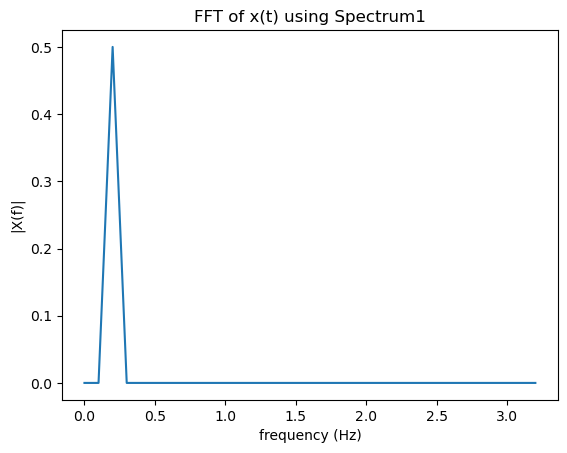

In [8]:
# exercise 3

# defining function (from notes)
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range 
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values 
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X

# parameters
N=64 #number of points
tau=10 #total time 
Fs=N/tau # sampling rate from notes
f=0.2 # frequency in Hz

t=np.linspace(0, tau, N, endpoint=False) # time array
x=np.cos(2*np.pi*f*t) #signal

# FFT using Spectrum1
frq, X=Spectrum1(x, Fs)

# plotting mag vs freq
plt.plot(frq, np.abs(X))
plt.xlabel('frequency (Hz)')
plt.ylabel('|X(f)|')
plt.title('FFT of x(t) using Spectrum1')
plt.show();

'''
the peak amplitude is 0.5 because cos splits fourier components into two at +f and -f
wach with amp 0.5. we only keep +ve parts so thats why it peaks at 0.5
''';

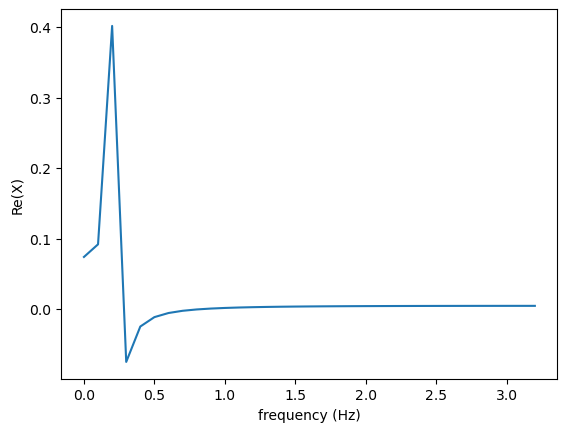

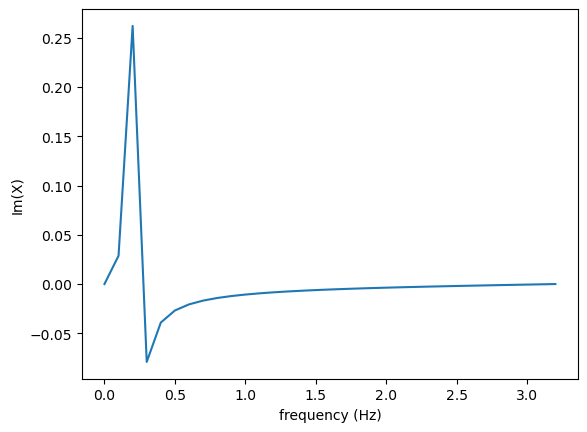

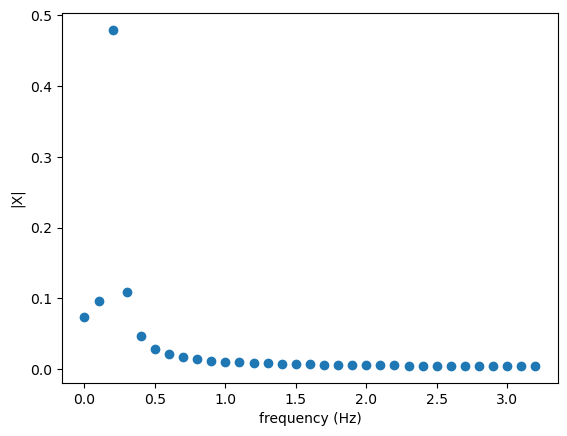

In [9]:
# exercise 4

# defining function (from notes)
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range 
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values 
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X
    
# parameters (same as before only f changes)
N=64 #number of points
tau=10 #total time 
Fs=N/tau # sampling rate from notes
f=0.22 # frequency in Hz

t=np.linspace(0, tau, N, endpoint=False) # time array
x=np.cos(2*np.pi*f*t) #signal

# FFT using Spectrum1
frq, X=Spectrum1(x, Fs)

#plotting

#real part
plt.plot(frq, np.real(X))
plt.xlabel('frequency (Hz)')
plt.ylabel('Re(X)')
plt.show();

#imaginary part
plt.plot(frq, np.imag(X))
plt.xlabel('frequency (Hz)')
plt.ylabel('Im(X)')
plt.show();

#magnitude
plt.plot(frq, np.abs(X), 'o')
plt.xlabel('frequency (Hz)')
plt.ylabel('|X|')
plt.show();

'''
f=0.22 Hz doesnt fit the bin spacing so it spreads out instead of being one spike
''';

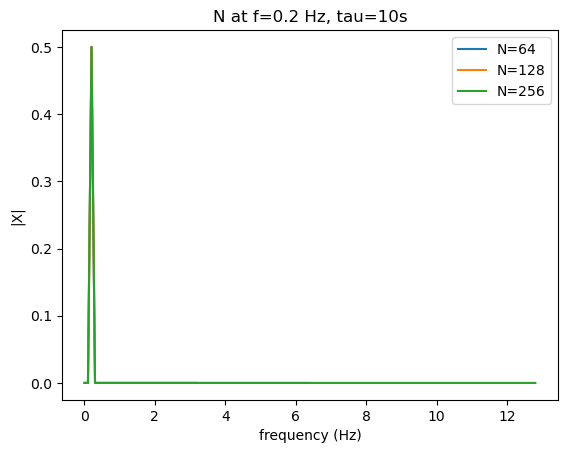

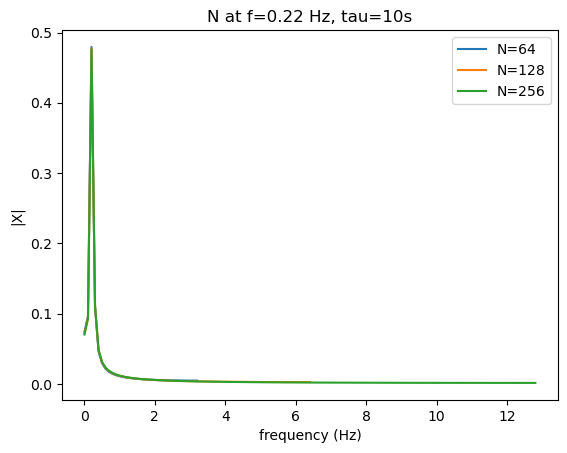

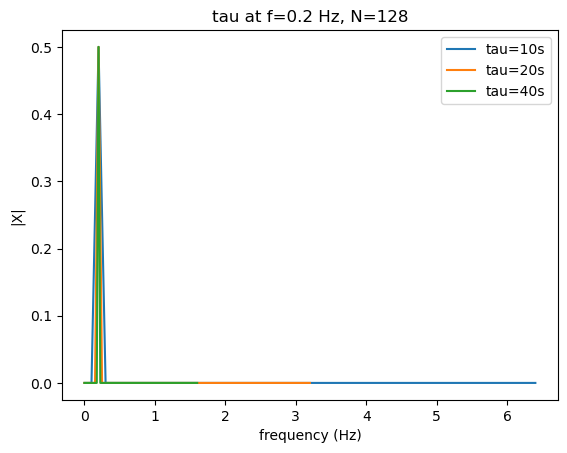

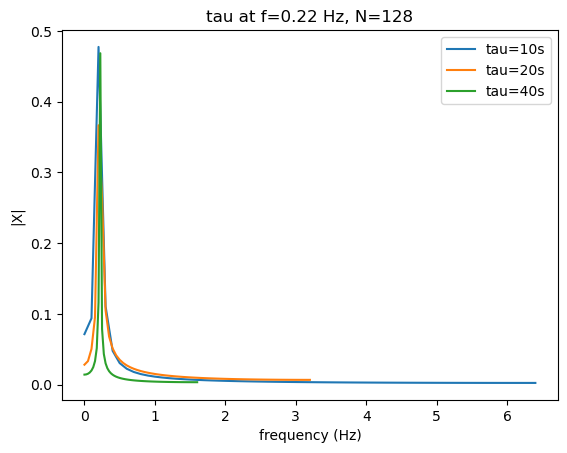

In [10]:
# exercise 5

# defining function (from notes)
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range 
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values 
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X
    
# (a) changing N
tau=10 #total time
fs= [0.2, 0.22] #the two frequencies
Ns= [64, 128, 256] # diff Ns

for f in fs:
    plt.figure()
    for N in Ns:
        Fs= N/tau
        t=np.linspace(0, tau, N, endpoint=False) # time array
        x=np.cos(2*np.pi*f*t) #signal
        frq, X=Spectrum1(x, Fs)
        plt.plot(frq, np.abs(X), label=f'N={N}')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('|X|')
    plt.title(f'N at f={f} Hz, tau={tau}s')
    plt.legend()
    plt.show();
'''
when N increases all plots overlap because its the same signal over same time
N increasing just makes the FFT smoother but not different at all
''';

# (b)
N=128 # fixed N
taus= [10, 20, 40] #different times
fs= [0.2, 0.22] #the two frequencies (same as before)

for f in fs:
    plt.figure()
    for tau in taus:
        Fs= N/tau
        t=np.linspace(0, tau, N, endpoint=False) # time array
        x=np.cos(2*np.pi*f*t) #signal
        frq, X=Spectrum1(x, Fs)
        plt.plot(frq, np.abs(X), label=f'tau={tau}s')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('|X|')
    plt.title(f'tau at f={f} Hz, N={N}')
    plt.legend()
    plt.show();
'''
as tau increases with fixed N, the peaks get narrower because the frequency resolution
improves (delta f = 1/tau)
for f=0.2 Hz the spike just becomes sharper
for f=0.22 Hz the spread becomes less spread out
''';

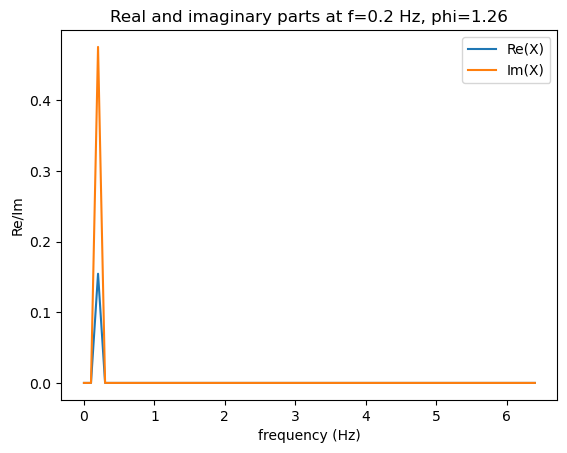

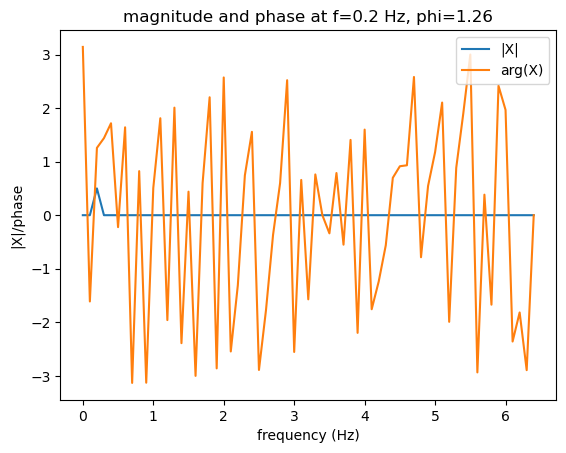

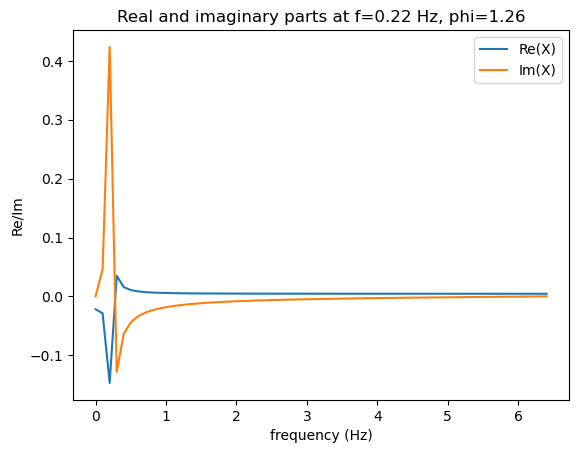

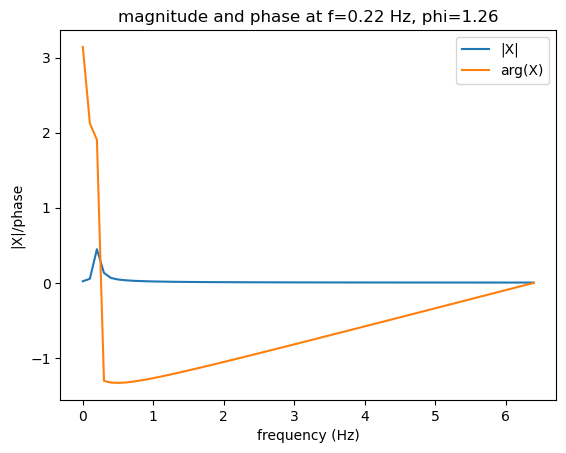

In [11]:
# exercise 6

# defining function (from notes)
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    
    frq = (float(Fs)/N)*np.arange(0, N//2+1) # one-sided frequency range 
    # // for integers to create indexes
    
    X = fft(x)/N # fft computing and normalization
    
    X = X[0:N//2+1] # take just positive values
    # // again because slicing needs integers
    
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X

# parameters 
N=128 #number of points
tau=10 #total time 
Fs=N/tau # sampling rate from notes
fs= [0.2, 0.22] #the two frequencies

phi=np.pi/2.5

for f in fs:
    t=np.linspace(0, tau, N, endpoint=False) # time array
    x=np.cos(2*np.pi*f*t + phi) #signal
    # add phi inside cos
    # this rotates cos and changes Re, Im, and arg
    frq, X=Spectrum1(x, Fs)

    # real and imaginary parts
    # beause phase is non zero Re and Im are no longer symmetric
    # instead of Im being alomst zero before, now non zero
    plt.figure()
    plt.plot(frq, np.real(X), label='Re(X)')
    plt.plot(frq, np.imag(X), label='Im(X)')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('Re/Im')
    plt.title(f'Real and imaginary parts at f={f} Hz, phi={phi:.2f}')
    plt.legend()
    plt.show();

    # mag and phase
    # |X| stays basiclaly the same bcz phase doesnt change magnitude
    # arg(X)=anle or phase
    # np.angle gives phase of each frequency bin
    plt.figure()
    plt.plot(frq, np.abs(X), label='|X|')
    plt.plot(frq, np.angle(X), label='arg(X)')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('|X|/phase')
    plt.title(f'magnitude and phase at f={f} Hz, phi={phi:.2f}')
    plt.legend()
    plt.show();

'''
phase factor changes with angle
''';

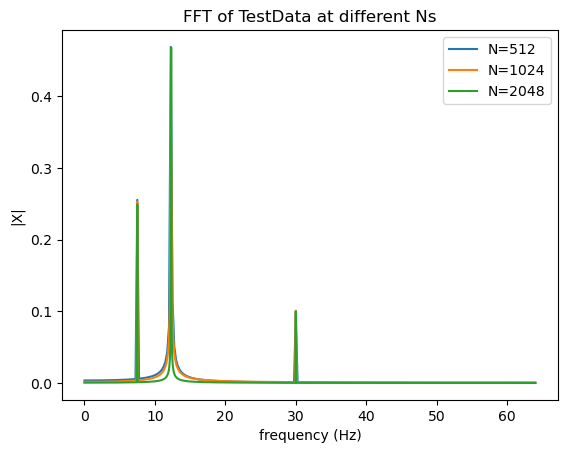

In [12]:
# exercise 7

def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    
    frq = (float(Fs)/N)*np.arange(0, N//2+1) # one-sided frequency range 
    # // for integers to create indexes
    
    X = fft(x)/N # fft computing and normalization
    
    X = X[0:N//2+1] # take just positive values
    # // again because slicing needs integers
    
    # (in python3, // ensures integer division)
    
    # frq is array of actual frequencies
    # X is complex array of amplitudes 
    return frq , X

def TestData(N, Fs):
    '''
    creates N points of data containing 3 cos waves with amps a1, a2, a3 and freqs f1, f2, f3
    '''
    a1, a2, a3 = 1, 0.5, 0.2
    f1, f2, f3 = 12.3, 7.5, 30
    tau=N/Fs # total time changes here. Fs=N/tau so tau= N/Fs
    t=np.linspace(0, tau, N, endpoint=False) # time array
    x= ( 
        a1*np.cos(2*np.pi*f1*t) +
        a2*np.cos(2*np.pi*f2*t) +
        a3*np.cos(2*np.pi*f3*t)
    )

    return t, x

Fs=128
Ns=[512, 1024, 2048]

plt.figure()
for N in Ns:
    t, x = TestData(N, Fs)
    frq, X = Spectrum1(x, Fs)
    plt.plot(frq, np.abs(X), label=f'N={N}')
plt.xlabel('frequency (Hz)')
plt.ylabel('|X|')
plt.title(f'FFT of TestData at different Ns')
plt.legend()
plt.show();

'''
testdata adds 3 cos waves which peak at 12.3, 7.5, and 30 Hz on the plot
the height corresponds with their amplitudes 1, 0.5, and 0.2
with amp 1 being the highest peak and then 0.5 and finally 0.2

when incrasing N with Fs fixed, the peaks stay at the same place but get narrower
because N increasing helps frequency resolution improve (delta f = Fs/N gets smaller)
''';